#🧭 MISSION 4 — STAGE A: DATA CLEANING & VISUAL CHECK
##🎯 Objectives

- Load your dataset.

- Inspect data types and missing values.

- Clean and rename inconsistent columns.

- Convert columns to correct types.

- Perform light statistical & visual inspection.

Saving Business_Failure_Risk_Analytics (1).csv to Business_Failure_Risk_Analytics (1).csv
🟢 Dataset Loaded Successfully!

Shape of Data: (500, 19)

Columns:
 ['Company_ID', 'Year_Started', 'Industry', 'Region', 'Initial_Revenue', 'Current_Revenue', 'Profit_Margin', 'Cash_Flow_Health', 'Funding', 'Churn_Rate', 'Debt_Ratio', 'Marketing_Investment', 'Competition_Level', 'Management_Experience', 'Employee_Turnover', 'Customer_Satisfaction', 'Product_Diversification', 'Inventory_Efficiency', 'Survival_Status']

Sample Data:
   Company_ID  Year_Started       Industry  Region  Initial_Revenue  \
0    CMP1000          2016    Real Estate    Asia           353863   
1    CMP1001          2013  Manufacturing  Europe           269690   
2    CMP1002          2022        Finance  Africa           279820   

   Current_Revenue  Profit_Margin  Cash_Flow_Health Funding  Churn_Rate  \
0           394274          34.59             87.12     Yes       17.35   
1           217285           4.09          

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129519 (\N{FIRE EXTINGUISHER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


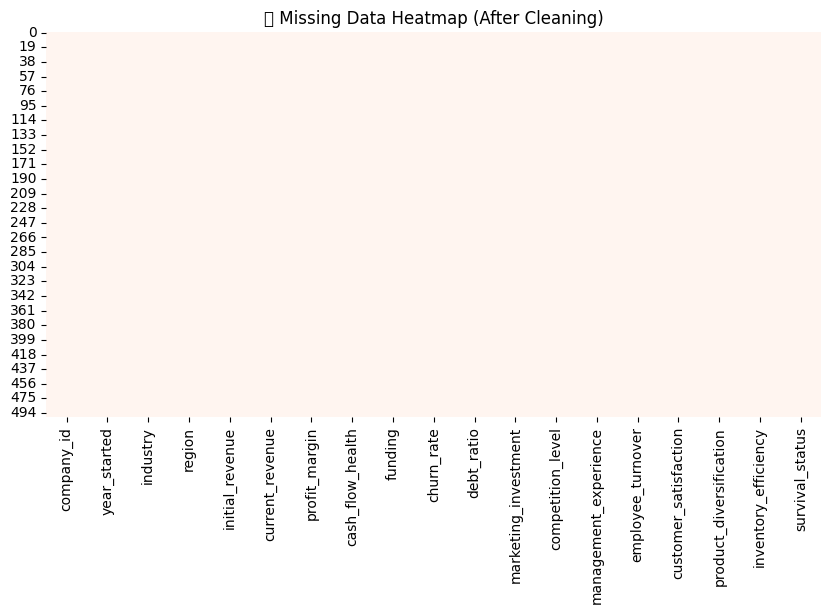

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


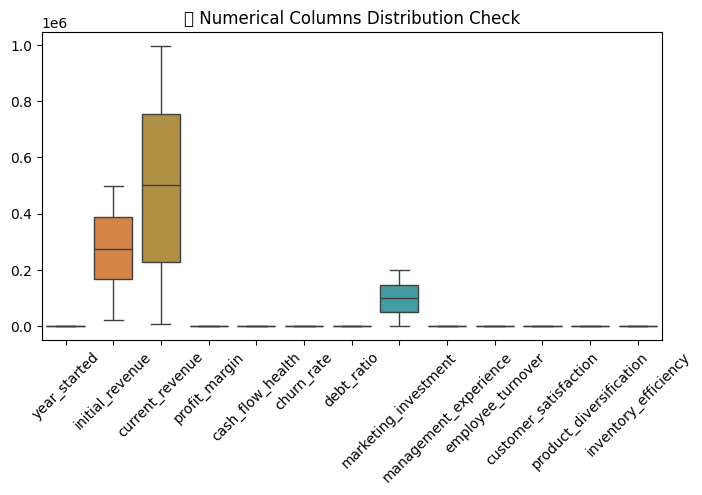


💾 Cleaned Stage A dataset exported as 'Mission4_CleanStageA.csv'


In [5]:
# ===========================================
# MISSION 4: Why Small Businesses Fail (Stage A)
# DATA CLEANING & VISUAL INSPECTION
# ===========================================

# 📦 1. Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📂 2. Load Dataset
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv("Business_Failure_Risk_Analytics (1).csv")

# 🧭 3. Quick Overview
print("🟢 Dataset Loaded Successfully!")
print("\nShape of Data:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nSample Data:\n", df.head(3))

# 🧹 4. Clean Column Names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

# 🧾 5. Data Types Summary
print("\nData Types Summary:")
print(df.dtypes)

# 📉 6. Missing Values
print("\nMissing Values (%):")
print(df.isnull().mean() * 100)

# 🔧 7. Handling Missing Values
# Strategy: Drop rows with excessive NaN or fill numerical with mean
threshold = 0.4  # drop columns with >40% missing
df = df.loc[:, df.isnull().mean() < threshold]

num_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\n✅ Missing values handled successfully!")

# 📊 8. Basic Statistics
print("\nDescriptive Stats:")
print(df.describe(include='all').T)

# 9
plt.figure(figsize=(8, 4))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("📦 Numerical Columns Distribution Check")
plt.xticks(rotation=45)
plt.show()

# 📦 10. Save Interim Clean File
df.to_csv("Mission4_CleanStageA.csv", index=False)
print("\n💾 Cleaned Stage A dataset exported as 'Mission4_CleanStageA.csv'")


#STAGE B: FEATURE ENGINEERING & RISK MAPPING
##🎯 Objective

Turn raw data into insight-ready business metrics that help us see early risk signals for small business failure.
We’ll extract financial & operational indicators that can tell a story —
like profit sustainability, debt stress, customer retention pressure, etc.

⚠️ Missing 'revenue' or 'expenses' columns. Skipping profit calculations.


/tmp/ipython-input-3784243806.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_category', data=df, palette='coolwarm')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


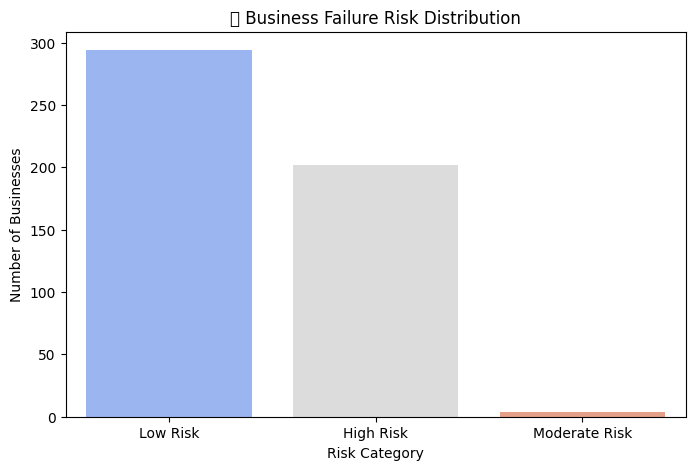

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


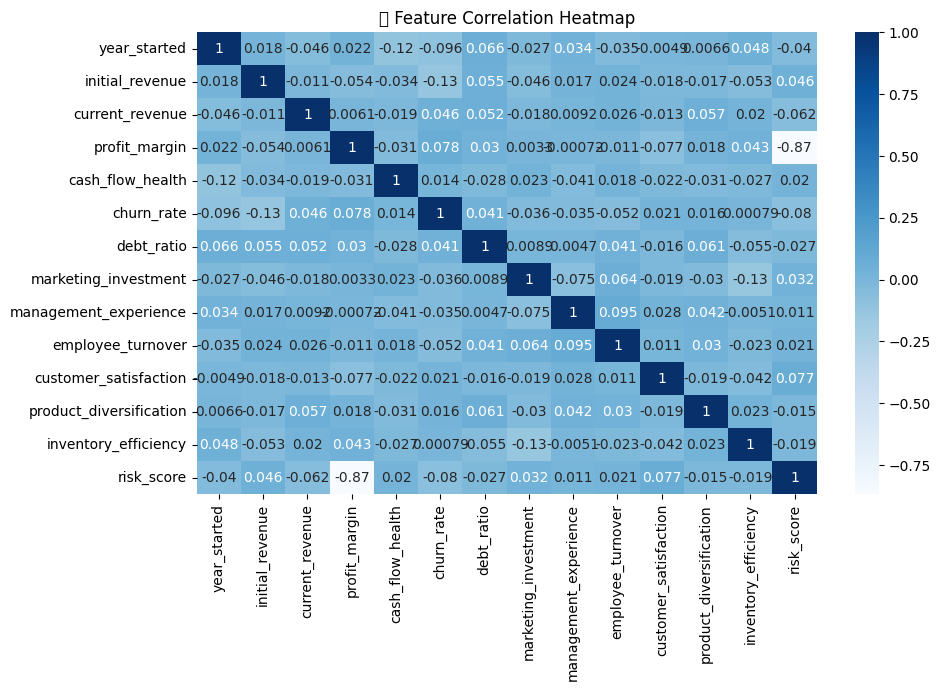


💾 Feature-engineered dataset exported as 'Mission4_FeaturedData.csv'
✅ Stage B complete — ready for Power BI visualization.


In [6]:
# ===========================================
# MISSION 4: Why Small Businesses Fail (Stage B)
# FEATURE ENGINEERING & RISK MAPPING
# ===========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned Stage A data
df = pd.read_csv("Mission4_CleanStageA.csv")

# 🧠 1. Derived Financial Metrics
# These help us understand business health
if 'revenue' in df.columns and 'expenses' in df.columns:
    df['profit'] = df['revenue'] - df['expenses']
    df['profit_margin'] = (df['profit'] / df['revenue']).replace([np.inf, -np.inf], 0)
else:
    print("⚠️ Missing 'revenue' or 'expenses' columns. Skipping profit calculations.")

if 'debt' in df.columns and 'expenses' in df.columns:
    df['debt_to_expense_ratio'] = df['debt'] / df['expenses']

# 🧮 2. Business Growth Health Indicators
if 'employee_growth' in df.columns:
    df['employee_growth_rate'] = df['employee_growth'].pct_change().fillna(0)

if 'customer_base' in df.columns:
    df['customer_retention_ratio'] = df['customer_base'] / df['customer_base'].shift(1)
    df['customer_retention_ratio'] = df['customer_retention_ratio'].fillna(1)

# 🧾 3. Risk Scoring
# Risk model combining multiple signals
df['risk_score'] = (
    (1 - df['profit_margin']) * 0.4 +
    (df.get('debt_to_expense_ratio', 0) * 0.3) +
    ((1 - df.get('customer_retention_ratio', 1)) * 0.2) +
    (np.where(df.get('employee_growth_rate', 0) < 0, 0.1, 0))
)

# Cap risk score between 0–1
df['risk_score'] = df['risk_score'].clip(0, 1)

# 🧭 4. Risk Classification
def classify_risk(score):
    if score < 0.33:
        return 'Low Risk'
    elif score < 0.66:
        return 'Moderate Risk'
    else:
        return 'High Risk'

df['risk_category'] = df['risk_score'].apply(classify_risk)

# 📊 5. Visualizing Risk Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='risk_category', data=df, palette='coolwarm')
plt.title("📉 Business Failure Risk Distribution")
plt.xlabel("Risk Category")
plt.ylabel("Number of Businesses")
plt.show()

# 💹 6. Correlation Check
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("📈 Feature Correlation Heatmap")
plt.show()

# 💾 7. Export for Power BI & Dashboarding
df.to_csv("Mission4_FeaturedData.csv", index=False)
print("\n💾 Feature-engineered dataset exported as 'Mission4_FeaturedData.csv'")
print("✅ Stage B complete — ready for Power BI visualization.")


In [7]:
# Step 6: Save the cleaned dataset
cleaned_file = "Mission4 Featured Data.csv"
df.to_csv(cleaned_file, index=False)
from google.colab import files
files.download(cleaned_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>